#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [ ]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.5/363.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.4/871.4 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=2c3fbe79c37d8a085f8de9c466320d833b1782f72cd312f17ab5510ea0e3a15f
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [ ]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [ ]:
import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

In [ ]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")

#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [ ]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [ ]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

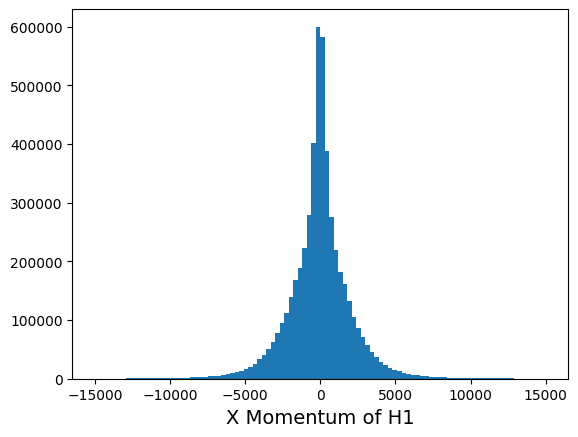

In [ ]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.4 MB/s eta 0:00:00
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                 

Text(0, 0.5, 'Number of events')

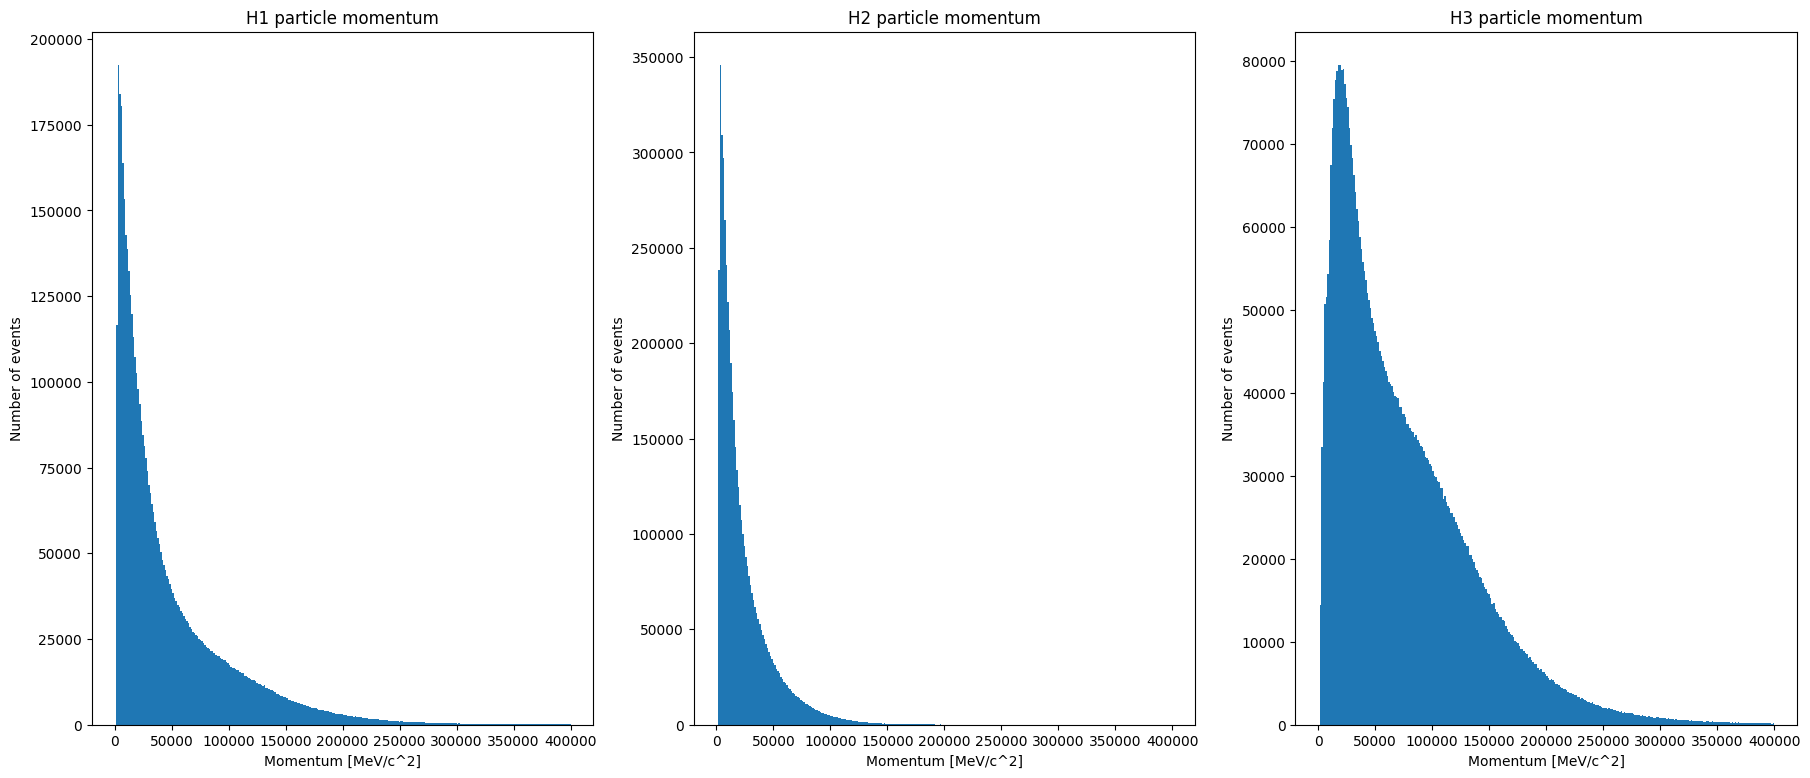

In [ ]:
#Installing uproot to decrease crashes
!pip install uproot awkward lz4 xxhash
import uproot
f=uproot.open ("/content/LHCb_Data/B2HHH_MagnetDown.root")
f.keys()
#Finding data with uproot
f["DecayTree"].show()

#Library for histograms
!pip install boost-histogram

#import numpy as np
import math
from numpy import sqrt
#import ROOT
import uproot
from matplotlib import pyplot as plt
import boost_histogram as bh

Events = f['DecayTree']

#Extracting momentum coponents of daughter particle 1
xp_H1 = f["DecayTree//H1_PX"].array() #array extracts data as Awkward array (used for large data set)
yp_H1 = f["DecayTree//H1_PY"].array()
zp_H1 = f["DecayTree//H1_PZ"].array()

#Extracting momentum components of daughter particle 2
xp_H2 = f["DecayTree//H2_PX"].array()
yp_H2 = f["DecayTree//H2_PY"].array()
zp_H2 = f["DecayTree//H2_PZ"].array()

#Extracting momentum components of daughter particle 2
xp_H3 = f["DecayTree//H3_PX"].array()
yp_H3 = f["DecayTree//H3_PY"].array()
zp_H3 = f["DecayTree//H3_PZ"].array()

#Computing total momentum (magnitude and direction) for daughter partciel 1/2/3
H1_Ptot = ((xp_H1**2)+(yp_H1**2)+(zp_H1**2))**0.5

H2_Ptot = ((xp_H2**2)+(yp_H2**2)+(zp_H2**2))**0.5

H3_Ptot = ((xp_H3**2)+(yp_H3**2)+(zp_H3**2))**0.5

fig=plt.figure(figsize=(22,9))
plt.subplot(1,3,1)
histPtot1 = bh.Histogram(bh.axis.Regular(300,0,400000))
histPtot1.fill(H1_Ptot)
plt.bar(histPtot1.axes[0].centers, histPtot1.values(), width=histPtot1.axes[0].widths)
plt.title('H1 particle momentum')
plt.xlabel('Momentum [MeV/c^2]')
plt.ylabel('Number of events')


plt.subplot(1,3,2)
histPtot2 = bh.Histogram(bh.axis.Regular(300,0,400000))
histPtot2.fill(H2_Ptot)
plt.bar(histPtot2.axes[0].centers, histPtot2.values(), histPtot2.axes[0].widths)
plt.title('H2 particle momentum')
plt.xlabel('Momentum [MeV/c^2]')
plt.ylabel('Number of events')

plt.subplot(1,3,3)
histPtot3 = bh.Histogram(bh.axis.Regular(300,0,400000))
histPtot3.fill(H3_Ptot)
plt.bar(histPtot3.axes[0].centers, histPtot3.values(), histPtot3.axes[0].widths)
plt.title('H3 particle momentum')
plt.xlabel('Momentum [MeV/c^2]')
plt.ylabel('Number of events')


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

Text(0, 0.5, 'Number of events')

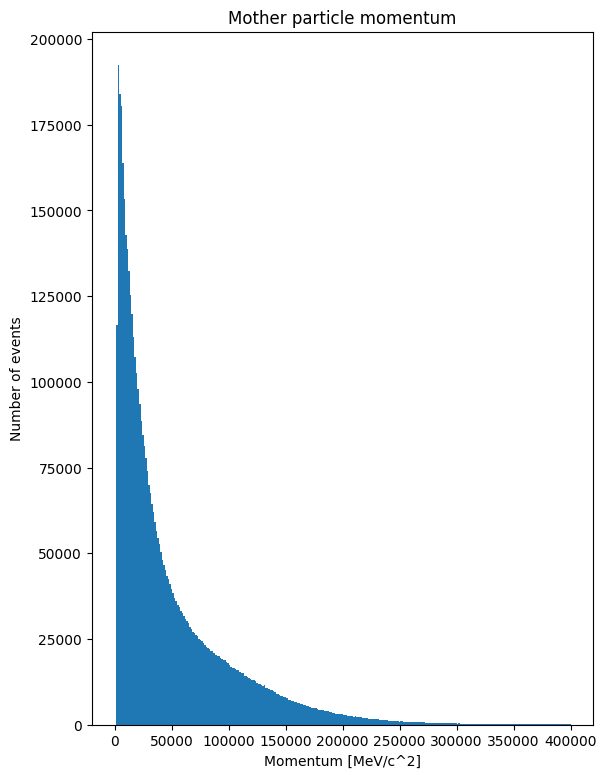

In [ ]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...


#Installing uproot to decrease crashes
!pip install uproot awkward lz4 xxhash
import uproot
f=uproot.open ("/content/LHCb_Data/B2HHH_MagnetDown.root")
f.keys()
#Finding data with uproot
f["DecayTree"].show()

#Library for histograms
!pip install boost-histogram

#import numpy as np
import math
from numpy import sqrt
#import ROOT
import uproot
from matplotlib import pyplot as plt
import boost_histogram as bh

#Extracting momentum coponents of daughter particle 1
xp_H1 = f["DecayTree//H1_PX"].array() #array extracts data as Awkward array (used for large data set)
yp_H1 = f["DecayTree//H1_PY"].array()
zp_H1 = f["DecayTree//H1_PZ"].array()

#Extracting momentum components of daughter particle 2
xp_H2 = f["DecayTree//H2_PX"].array()
yp_H2 = f["DecayTree//H2_PY"].array()
zp_H2 = f["DecayTree//H2_PZ"].array()

#Extracting momentum components of daughter particle 2
xp_H3 = f["DecayTree//H3_PX"].array()
yp_H3 = f["DecayTree//H3_PY"].array()
zp_H3 = f["DecayTree//H3_PZ"].array()



#Vector components for mother momentum
xp_mother = xp_H1 + xp_H2 + xp_H3
yp_mother = yp_H1 + yp_H2 + yp_H3
zp_mother = zp_H1 + zp_H2 + zp_H3

#Formula to compute total momentum of mother particle (magnitude and direction)
B_ptotal = (xp_mother**2 + yp_mother**2 + zp_mother**2)**0.5

fig=plt.figure(figsize=(22,9))
plt.subplot(1,3,1)
histPtot1 = bh.Histogram(bh.axis.Regular(300,0,400000))
histPtot1.fill(H1_Ptot)
plt.bar(histPtot1.axes[0].centers, histPtot1.values(), width=histPtot1.axes[0].widths)
plt.title('Mother particle momentum')
plt.xlabel('Momentum [MeV/c^2]')
plt.ylabel('Number of events')






So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [ ]:
import uproot
f=uproot.open ("/content/LHCb_Data/B2HHH_MagnetDown.root")
Events = f['DecayTree']
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches = Events.arrays()

# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()

# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")


for branch, value in branches_dictionary[45].items():
    print (f"{branch}  :  {value}")

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Mass of kaons in MeV
m_kaon = 493.677


#Extracting momentum components of Kaon 1
xp_K1 = f["DecayTree/H1_PX"].array()
yp_K1 = f["DecayTree/H1_PY"].array()
zp_K1 = f["DecayTree/H1_PZ"].array()

#Extracting momentum components of Kaon 2
xp_K2 = f["DecayTree/H2_PX"].array()
yp_K2 = f["DecayTree/H2_PY"].array()
zp_K2 = f["DecayTree/H2_PZ"].array()

#Extracting momentum components of Kaon 3
xp_K3 = f["DecayTree/H3_PX"].array()
yp_K3 = f["DecayTree/H3_PY"].array()
zp_K3 = f["DecayTree/H3_PZ"].array()

K1_Ptot = (xp_K1**2 + yp_K1**2 + zp_K1**2)**0.5
K2_Ptot = (xp_K2**2 + yp_K2**2 + zp_K2**2)**0.5
K3_Ptot = (xp_K3**2 + yp_K3**2 + zp_K3**2)**0.5

#Vector components for kaon momentum
xp_kaon = xp_K1 + xp_K2 + xp_K3
yp_kaon = yp_K1 + yp_K2 + yp_K3
zp_kaon = zp_K1 + zp_K2 + zp_K3

#Formula to compute total momentum of kaon particle (magnitude and direction)
M_Ptot = (xp_kaon**2 + yp_kaon**2 + zp_kaon**2)**0.5

#Formula for energy of Kaon 1/2/3

E_K1 = (K1_Ptot**2 + m_kaon**2)**0.5
E_K2 = (K2_Ptot**2 + m_kaon**2)**0.5
E_K3 = (K3_Ptot**2 + m_kaon**2)**0.5

E_tot = E_K1 + E_K2 + E_K3



We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

Text(0, 0.5, 'Number of events')

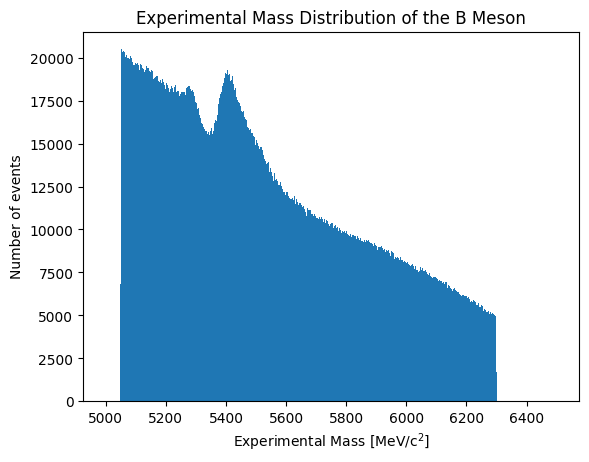

In [ ]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters

#Now plot a histogram of the range of masses of the B meson.

#Does this match what we would expect from theory?

#Hint - look it up

#Library for histograms
!pip install boost-histogram

#import numpy as np
import math
from numpy import sqrt
from matplotlib import pyplot as plt
import boost_histogram as bh

#Formula for experimental mass
Experimental_mass=(((E_tot)**2)-((M_Ptot)**2))**0.5

plt.figure(1)
hist_mass = bh.Histogram(bh.axis.Regular(500, 5000, 6500))
hist_mass.fill(Experimental_mass)
plt.bar(hist_mass.axes[0].centers, hist_mass.values(), hist_mass.axes[0].widths)
plt.title('Experimental Mass Distribution of the B Meson')
plt.xlabel('Experimental Mass [MeV/c$^2$]')
plt.ylabel('Number of events')

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

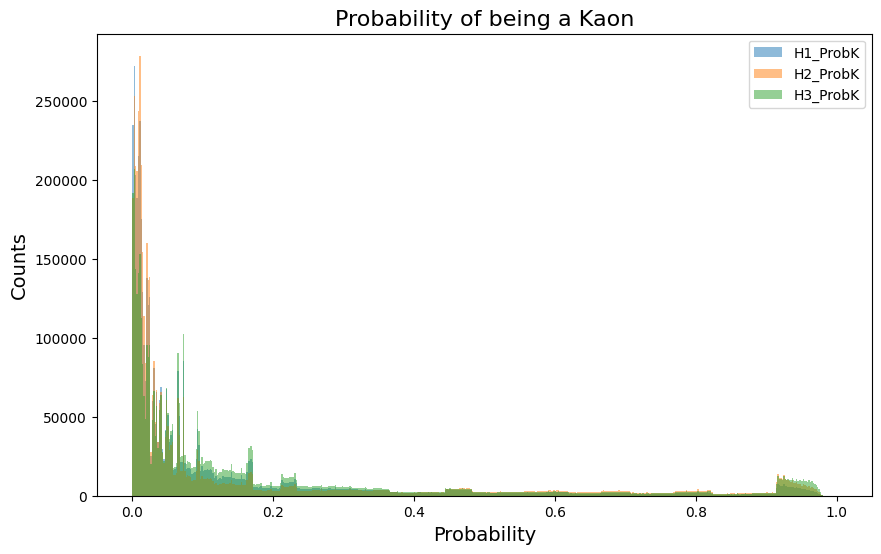

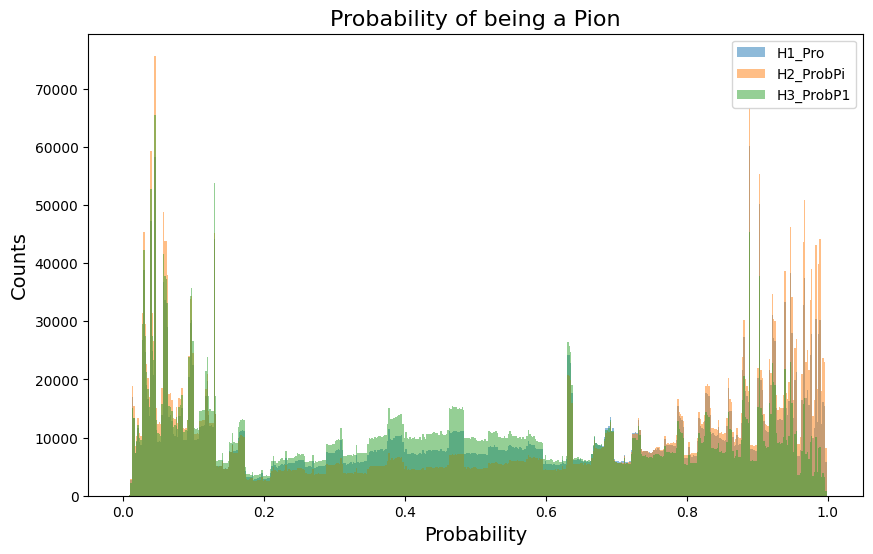

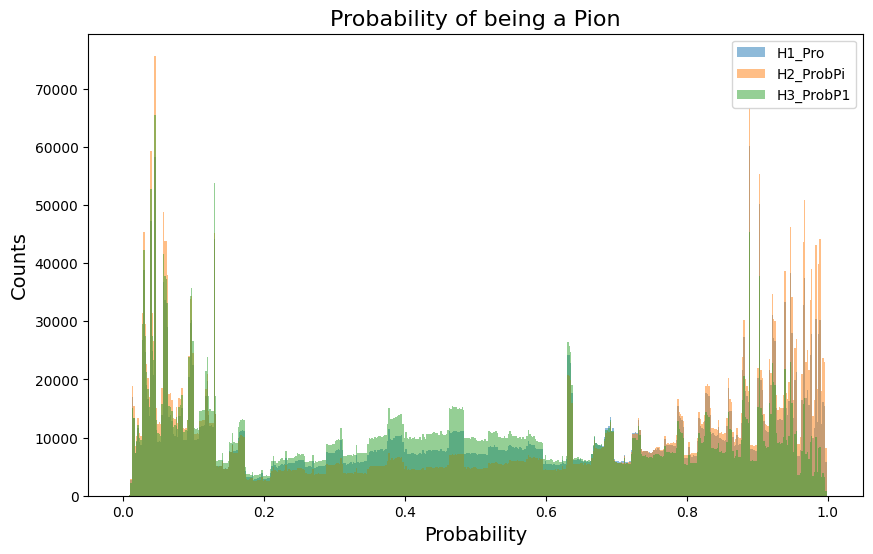

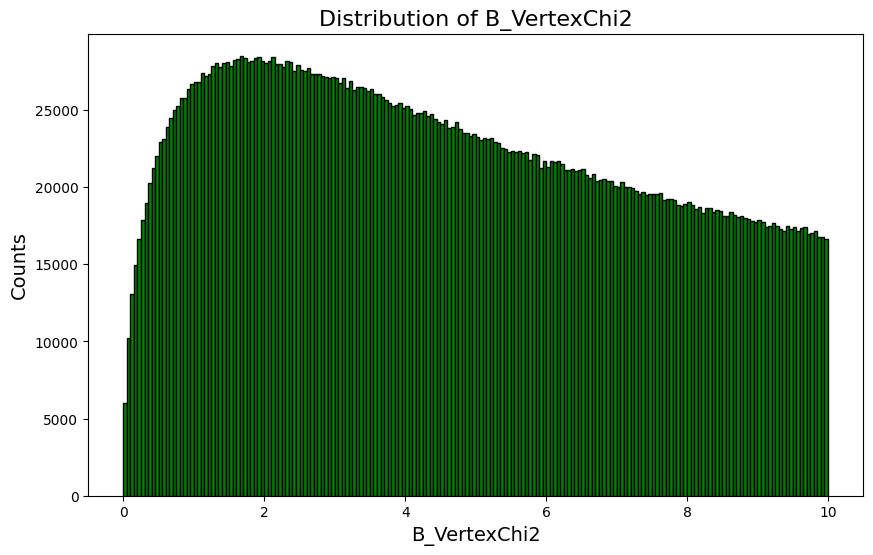

In [ ]:
#Make plots of H1/H2/H3 _ProbK on one plot


#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2
# Plot any other variables from the list above you think would be handy to use in a selection...



H1_ProbK = Events ['H1_ProbK'].array()
H2_ProbK = Events ['H2_ProbK'].array()
H3_ProbK = Events['H3_ProbK'].array ()

#Make plots of H1/H2/H3 ProbK on one plot
plt.figure(figsize=(10, 6))
plt.hist(H1_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H1_ProbK')
plt.hist(H2_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H2_ProbK')
plt.hist(H3_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H3_ProbK')
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()
plt.title( 'Probability of being a Kaon', fontsize=16)
plt.show()


#Make plots of H1/H2/H3 ProbPi on one plot
H1_ProbPi = Events['H1_ProbPi'].array()
H2_ProbPi = Events['H2_ProbPi'].array()
H3_ProbPi = Events['H3_ProbPi'].array()


plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H1_Pro')
plt.hist(H2_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H3_ProbP1')
plt.xlabel('Probability', fontsize=14)
plt.ylabel ('Counts', fontsize=14)
plt.legend()
plt.title('Probability of being a Pion', fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H1_Pro')
plt.hist(H2_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H3_ProbP1')
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend ()
plt.title('Probability of being a Pion', fontsize=16)
plt.show()

#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = Events ['B_VertexChi2'].array()

# Plot the B_VertexChi2
plt.figure(figsize=(10, 6))
plt.hist(B_VertexChi2, bins=200, range=(0, 10), color='green', edgecolor='black')
plt.xlabel('B_VertexChi2', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title( 'Distribution of B_VertexChi2', fontsize=16)
plt.show()




Using these plots, we can now think about making a preselection. This has some format like the below:

In [ ]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)

#Defining probability of being a muon
H1_isMuon = branches['H1_isMuon']
H2_isMuon = branches['H2_isMuon']
H3_isMuon = branches['H3_isMuon']


#Selection
H1_ProbK > H1_ProbPi
H2_ProbK > H2_ProbPi
H3_ProbK > H3_ProbPi
H1_isMuon == 0
H2_isMuon == 0
H3_isMuon == 0


selection = (branches["H1_ProbK"] > branches["H1_ProbPi"]) & (branches["H2_ProbK"] > branches["H2_ProbPi"]) & (branches["H3_ProbK"] > branches["H3_ProbPi"]) & (branches["H1_isMuon"] == 0) & (branches["H2_isMuon"] == 0) & (branches["H3_isMuon"] == 0)

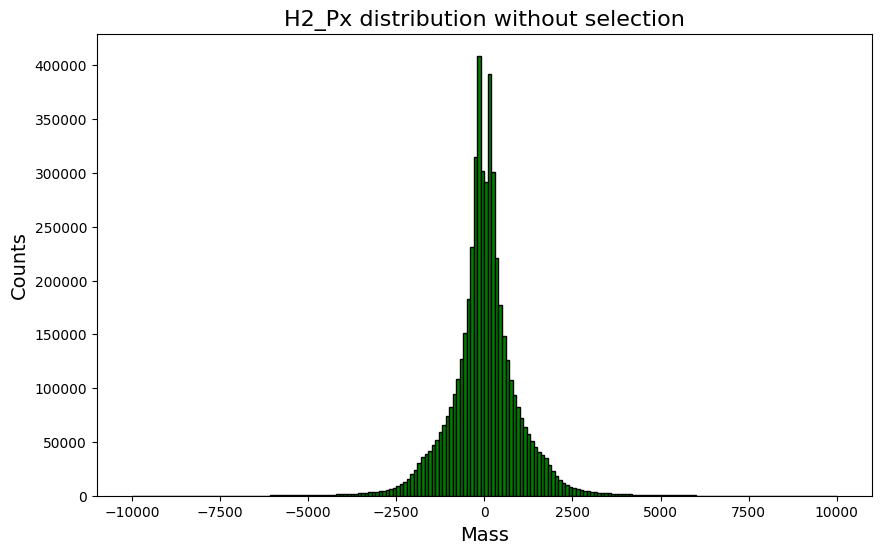

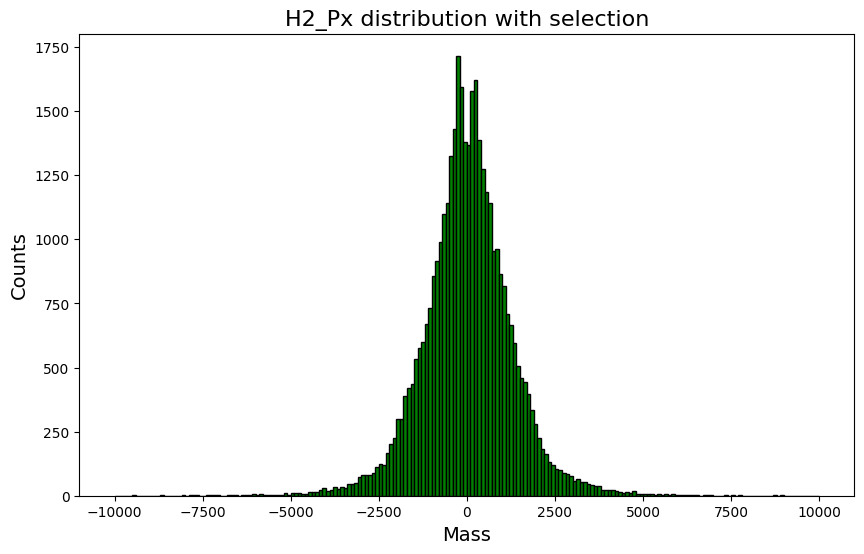

In [ ]:


#Plotting H2_PX without selection
plt.figure(figsize=(10, 6))
plt.hist(branches['H2_PX'], bins=200, range=(-10000, 10000), color='green', edgecolor='black')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title( 'H2_Px distribution without selection', fontsize=16)
plt.show()



#To apply the selection - we can use the selection command after our instruction e.g.:
CutTree=branches['H2_PX'][selection]

#Plotting H2_PX with selection
plt.figure(figsize=(10, 6))
plt.hist(branches['H2_PX'][selection], bins=200, range=(-10000, 10000), color='green', edgecolor='black')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title( 'H2_Px distribution with selection', fontsize=16)
plt.show()


#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree



#Try plotting our H2_PX distribution with and without the selection and spot the differences...

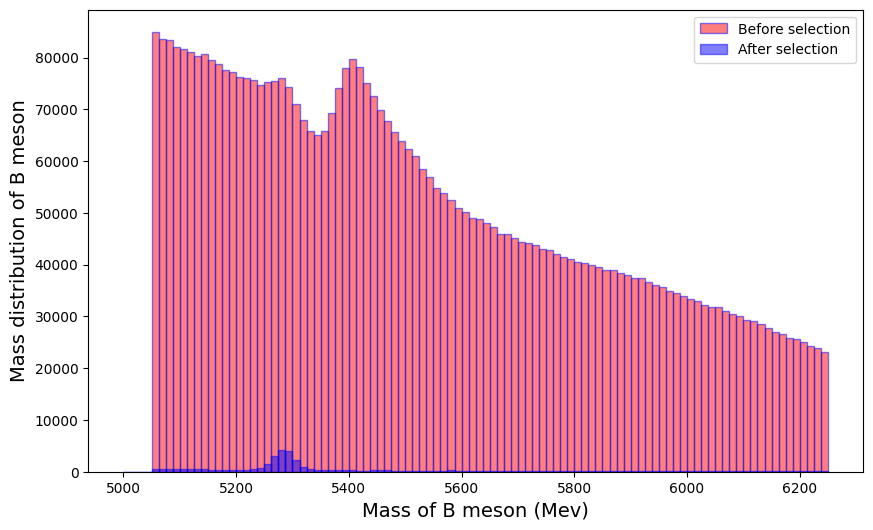

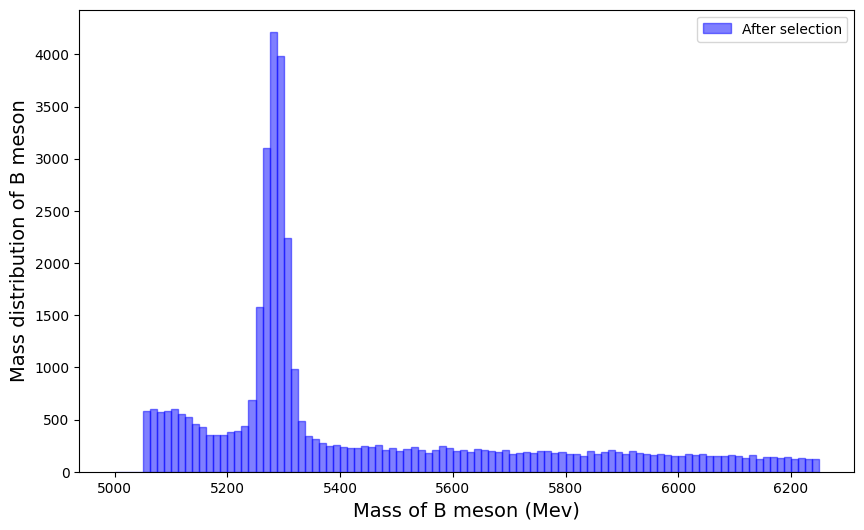

In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.


#Formula for experimental mass before selection
Experimental_mass=(((E_tot)**2)-((M_Ptot)**2))**0.5

#Experimental mass after selection
Experimental_mass_selection=Experimental_mass[selection]

H1_E_tot = E_K1[selection]
H2_E_tot = E_K2[selection]
H3_E_tot = E_K3[selection]
H1_Px = xp_K1[selection]
H2_Px = xp_K2[selection]
H3_Px = xp_K3[selection]
H1_Py = yp_K1[selection]
H2_Py = yp_K2[selection]
H3_Py = yp_K3[selection]
H1_Pz = zp_K1[selection]
H2_Pz = zp_K2[selection]
H3_Pz = zp_K3[selection]




#Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(Experimental_mass, bins=100, range=(5000, 6250), alpha=0.5, label='Before selection', color = 'red', edgecolor= 'blue')
plt.hist(Experimental_mass_selection, bins=100, range=(5000, 6250), alpha=0.5, label='After selection', color = 'blue', edgecolor = 'blue')
plt.xlabel('Mass of B meson (Mev)', fontsize=14)
plt.ylabel('Mass distribution of B meson', fontsize=14)
plt.legend ()
plt.show()



plt.figure(figsize=(10, 6))
plt.hist(Experimental_mass_selection, bins=100, range=(5000, 6250), alpha=0.5, label='After selection', color = 'blue', edgecolor = 'blue')
plt.xlabel('Mass of B meson (Mev)', fontsize=14)
plt.ylabel('Mass distribution of B meson', fontsize=14)
plt.legend ()
plt.show()



# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

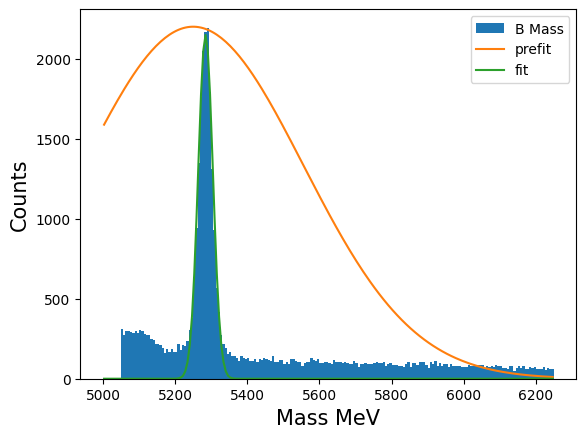

In [ ]:
from scipy.optimize import curve_fit


# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height, bin_edge, _ = plt.hist(Experimental_mass_selection, range=(5000, 6250), bins=200, label = "B Mass")

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height


#Create a Gauss function for fitting - nothing needs changing here
def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#Defining initial parameters
A_guess = 2200
mu_guess = 5250
sigma_guess = np.std(Experimental_mass_selection)

initial_guess = [A_guess, mu_guess, sigma_guess]

# Get the fitted curve - some things need changing here
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=initial_guess);
#note you need to pick some initial parameters in p0= above!
y_before_guess = gauss(x_data, *initial_guess)
yfit = gauss(x_data, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well
plt.plot(x_data, y_before_guess, label='prefit')
plt.plot(x_data, yfit, label='fit');
plt.xlabel("Mass MeV", fontsize=15)
plt.ylabel("Counts", fontsize=15)

plt.legend()
plt.show()

Optimized Gaussian Parameters: A = 2148.38, mu = 5284.37, sigma = 20.29
Optimized Gaussian Parameters: A = 2148.38, mu = 5284.37, sigma = 20.29
Fitted Gaussian: A=2057.03, mu=5284.48, sigma=18.07
Fitted Exponential: B=17293.78, alpha=0.000897


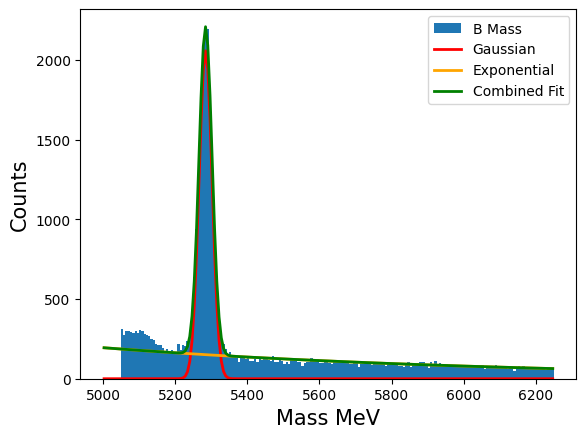

In [ ]:
# Explore optimisedParameters - what does it contain?
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...

# Print optimised parameters from previous fit
print(f"Optimized Gaussian Parameters: A = {optimisedParameters[0]:.2f}, mu = {optimisedParameters[1]:.2f}, sigma = {optimisedParameters[2]:.2f}")


bin_height, bin_edge, _ = plt.hist(Experimental_mass_selection, range=(5000, 6250), bins=200, label="B Mass")

# Defining the Exponential function
def exponential(x, B, alpha):
    return B * np.exp(-alpha * x)

# Definining the combined model of Gaussian and Exponential
def combined_model(x, A, mu, sigma, B, alpha):
    return gauss(x, A, mu, sigma) + exponential(x, B, alpha)



# Convert bin edges to bin centers
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

# Define the initial parameters already decided in the previous code
A_guess = optimisedParameters[0]
mu_guess = optimisedParameters[1]
sigma_guess = optimisedParameters[2]

# Printing the parameters from previous fit
print(f"Optimized Gaussian Parameters: A = {optimisedParameters[0]:.2f}, mu = {optimisedParameters[1]:.2f}, sigma = {optimisedParameters[2]:.2f}")

#Estimating values for the background amplitude and decay rate
B_guess = 500 #this is the starting height of the background distribution
alpha_guess = 0.0005 #this is controlling how fast the background falls as the mass increases

initial_guess_combined = [A_guess, mu_guess, sigma_guess, B_guess, alpha_guess]

# Get the fitted curve for both exponential and gaussian
optimised_combined, pcov_combined = curve_fit(combined_model, x_data, y_data, p0=initial_guess_combined)

# Extracting the parameters and printing them
A_fit, mu_fit, sigma_fit, B_fit, alpha_fit = optimised_combined
print(f"Fitted Gaussian: A={A_fit:.2f}, mu={mu_fit:.2f}, sigma={sigma_fit:.2f}")
print(f"Fitted Exponential: B={B_fit:.2f}, alpha={alpha_fit:.6f}")

# Generate fitted curves
y_gauss_fit = gauss(x_data, A_fit, mu_fit, sigma_fit)
y_exponential_fit = exponential(x_data, B_fit, alpha_fit)
y_combined_fit = combined_model(x_data, A_fit, mu_fit, sigma_fit, B_fit, alpha_fit)


# Overlaying the fits
plt.plot(x_data, y_gauss_fit, label='Gaussian', color='red', linewidth=2)
plt.plot(x_data, y_exponential_fit, label='Exponential', color='orange', linewidth=2)
plt.plot(x_data, y_combined_fit, label='Combined Fit', color='green', linewidth=2)
plt.xlabel("Mass MeV", fontsize=15)
plt.ylabel("Counts", fontsize=15)

plt.legend()
plt.show()






Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

Optimized Gaussian Parameters: A = 2148.38, mu = 5284.37, sigma = 20.29
Fitted Crystal Ball: A=2080.41, mu=5284.50, sigma=18.27, n=0.51, alpha=2.06
Fitted Exponential: B=2569.13, beta=0.000572


<ipython-input-56-3563f70a1593>:14: RuntimeWarning: invalid value encountered in power
  A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) / ((n / abs(alpha) - abs(alpha) - z) ** n),
<ipython-input-56-3563f70a1593>:14: RuntimeWarning: invalid value encountered in scalar power
  A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) / ((n / abs(alpha) - abs(alpha) - z) ** n),


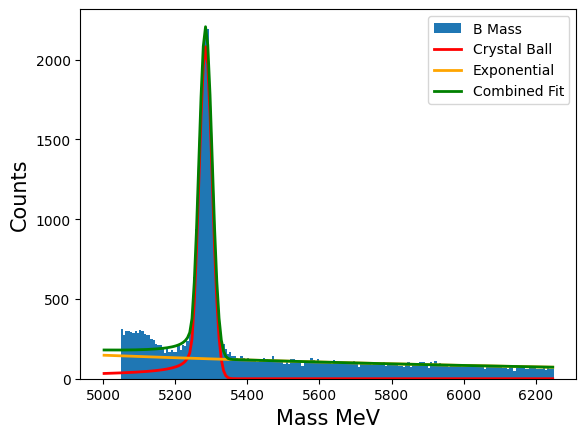

In [ ]:
# Explore optimisedParameters - what does it contain?
# The following code is done for crystal ball + exponential model

# Printing the optimised parameters chosen in previous codes for Crystal Ball function
print(f"Optimized Gaussian Parameters: A = {optimisedParameters[0]:.2f}, mu = {optimisedParameters[1]:.2f}, sigma = {optimisedParameters[2]:.2f}")

# Creating a fucntion for Crystal Ball
def crystal_ball(x, A, mu, sigma, n, alpha):
    z = (x - mu) / sigma
    if isinstance(x, np.ndarray):
        result = np.where(
            z > -alpha,
            A * np.exp(-0.5 * z**2),
            A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) / ((n / abs(alpha) - abs(alpha) - z) ** n),
        )
    else:
        if z > -alpha:
            result = A * np.exp(-0.5 * z**2)
        else:
            result = A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) / ((n / abs(alpha) - abs(alpha) - z) ** n)
    return result

# Function to combine the function of Crystal Ball and Exponential function (taken from the previous code)
def combined_crystalball_model(x, A, mu, sigma, n, alpha, B, beta):
    return crystal_ball(x, A, mu, sigma, n, alpha) + exponential(x, B, beta)

# Extracting the bin height and its edges
bin_height, bin_edge, _ = plt.hist(Experimental_mass_selection, range=(5000, 6250), bins=200, label="B Mass")

# Convert bin edges to bin centers
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

# Defining Initial Guesses

#Define the initial parameters already decided in the previous code for exponential
A_guess = optimisedParameters[0]
mu_guess = optimisedParameters[1]
sigma_guess = optimisedParameters[2]

#Guesses for Crystal Ball
n_guess = 5
alpha_guess = 1.5
B_guess = 500
beta_guess = 0.0005

initial_guess_combined = [A_guess, mu_guess, sigma_guess, n_guess, alpha_guess, B_guess, beta_guess]

# Get the fitted data
optimised_combined, pcov_combined = curve_fit(combined_crystalball_model, x_data, y_data, p0=initial_guess_combined)

# Extracting the parameters and printing them
A_fit, mu_fit, sigma_fit, n_fit, alpha_fit, B_fit, beta_fit = optimised_combined
print(f"Fitted Crystal Ball: A={A_fit:.2f}, mu={mu_fit:.2f}, sigma={sigma_fit:.2f}, n={n_fit:.2f}, alpha={alpha_fit:.2f}")
print(f"Fitted Exponential: B={B_fit:.2f}, beta={beta_fit:.6f}")

# Generate fitted curves
y_crystal_fit = crystal_ball(x_data, A_fit, mu_fit, sigma_fit, n_fit, alpha_fit)
y_exponential_fit = exponential(x_data, B_fit, beta_fit)
y_combined_fit = combined_crystalball_model(x_data, A_fit, mu_fit, sigma_fit, n_fit, alpha_fit, B_fit, beta_fit)

# Overlaying the fits
plt.plot(x_data, y_crystal_fit, label='Crystal Ball', color='red', linewidth=2)
plt.plot(x_data, y_exponential_fit, label='Exponential', color='orange', linewidth=2)
plt.plot(x_data, y_combined_fit, label='Combined Fit', color='green', linewidth=2)
plt.xlabel("Mass MeV", fontsize=15)
plt.ylabel("Counts", fontsize=15)

plt.legend()
plt.show()


So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

# Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

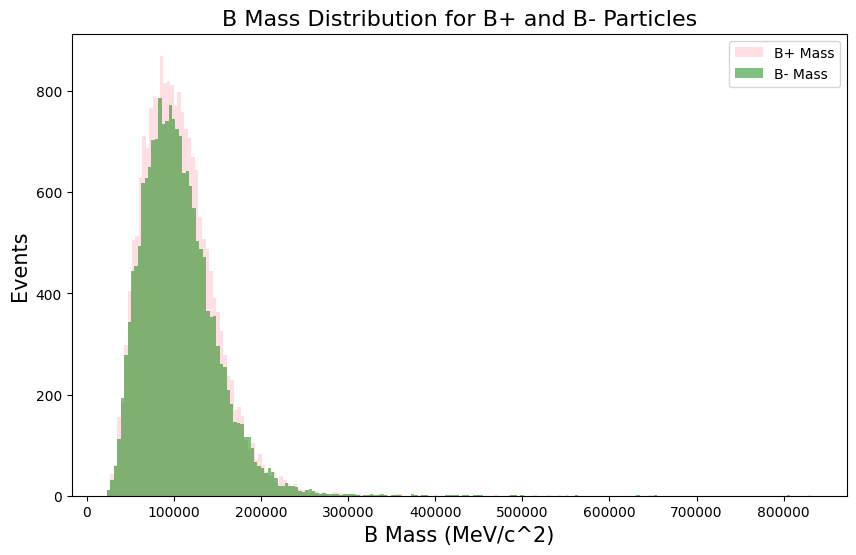

The number of B Plus: 27013.075639216335
The number of B Min: 24099.71830021983
The asymmetry between B Plus and B Min is: -0.05699859300292916 with uncertainty: 0.004415994912734602


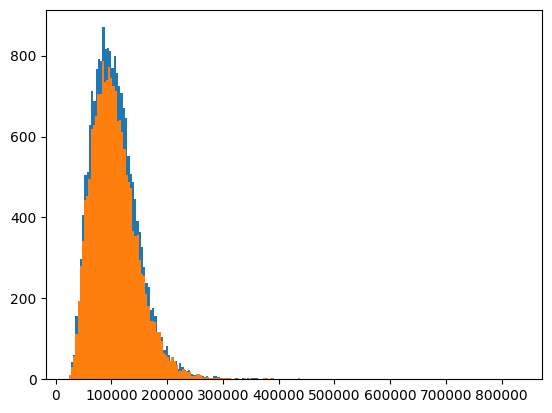

In [ ]:
from scipy.optimize import curve_fit


#optimizing parameters from the combined model of Gaussian and Exponential
def get_parameters(initial_params, x_data, y_data):
    optimised_params, pcov = curve_fit(
        lambda x, A, mu, sigma, B, alpha: combined_model(x, A, mu, sigma, B, alpha),
        x_data, y_data, p0=initial_params
    )
    return optimised_params, pcov


# Extracting charge values for the three daughter particles
H1_Charge = f["DecayTree//H1_Charge"].array()
H2_Charge = f["DecayTree//H2_Charge"].array()
H3_Charge = f["DecayTree//H3_Charge"].array()


# Defining the charge selection masks with existing selection
charge_selection_B_Plus = (H1_Charge + H2_Charge + H3_Charge == 1) & selection
charge_selection_B_Min = (H1_Charge + H2_Charge + H3_Charge == -1) & selection



# Extracting momentum components for x, y and z for the selected events
xp_H1_Cut_Plus, xp_H2_Cut_Plus, xp_H3_Cut_Plus = xp_H1[charge_selection_B_Plus], xp_H2[charge_selection_B_Plus], xp_H3[charge_selection_B_Plus]
yp_H1_Cut_Plus, yp_H2_Cut_Plus, yp_H3_Cut_Plus = yp_H1[charge_selection_B_Plus], yp_H2[charge_selection_B_Plus], yp_H3[charge_selection_B_Plus]
zp_H1_Cut_Plus, zp_H2_Cut_Plus, zp_H3_Cut_Plus = zp_H1[charge_selection_B_Plus], zp_H2[charge_selection_B_Plus], zp_H3[charge_selection_B_Plus]

xp_H1_Cut_Min, xp_H2_Cut_Min, xp_H3_Cut_Min = xp_H1[charge_selection_B_Min], xp_H2[charge_selection_B_Min], xp_H3[charge_selection_B_Min]
yp_H1_Cut_Min, yp_H2_Cut_Min, yp_H3_Cut_Min = yp_H1[charge_selection_B_Min], yp_H2[charge_selection_B_Min], yp_H3[charge_selection_B_Min]
zp_H1_Cut_Min, zp_H2_Cut_Min, zp_H3_Cut_Min = zp_H1[charge_selection_B_Min], zp_H2[charge_selection_B_Min], zp_H3[charge_selection_B_Min]

# Computing the mass of B+ and B- mesons
M_B_Plus = (((xp_H1_Cut_Plus + xp_H2_Cut_Plus + xp_H3_Cut_Plus)**2 + (yp_H1_Cut_Plus + yp_H2_Cut_Plus + yp_H3_Cut_Plus)**2 + (zp_H1_Cut_Plus + zp_H2_Cut_Plus + zp_H3_Cut_Plus)**2)**0.5)
M_B_Min = (((xp_H1_Cut_Min + xp_H2_Cut_Min + xp_H3_Cut_Min)**2 + (yp_H1_Cut_Min + yp_H2_Cut_Min + yp_H3_Cut_Min)**2 + (zp_H1_Cut_Min + zp_H2_Cut_Min + zp_H3_Cut_Min)**2)**0.5)



# Plotting the histograms for B+ and B- mass distributions
plt.figure(figsize=(10, 6))
plt.hist(M_B_Plus, bins=200, alpha=0.5, color='pink', label='B+ Mass')
plt.hist(M_B_Min, bins=200, alpha=0.5, color='green', label='B- Mass')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution for B+ and B- Particles", fontsize=16)
plt.legend()
plt.show()



# Fit Gaussian and Exponential functions
bin_height_Plus, bin_edge_Plus, _ = plt.hist(M_B_Plus, bins=200)
bin_height_Min, bin_edge_Min, _ = plt.hist(M_B_Min, bins=200)

x_data_Plus = 0.5 * (bin_edge_Plus[1:] + bin_edge_Plus[:-1])
y_data_Plus = bin_height_Plus
x_data_Min = 0.5 * (bin_edge_Min[1:] + bin_edge_Min[:-1])
y_data_Min = bin_height_Min

# Optimizing parameters for the fits
initialParameters_B_Plus = [max(y_data_Plus), np.mean(M_B_Plus), np.std(M_B_Plus), max(y_data_Plus)*0.2, 0.00001]
initialParameters_B_Min = [max(y_data_Min), np.mean(M_B_Min), np.std(M_B_Min), max(y_data_Min)*0.2, 0.00001]

optimisedParameters_B_Plus, pcov_B_Plus = get_parameters(initialParameters_B_Plus, x_data_Plus, y_data_Plus)
optimisedParameters_B_Min, pcov_B_Min = get_parameters(initialParameters_B_Min, x_data_Min, y_data_Min)

# Extracting the above fitted parameters
A_Plus, mu_Plus, sigma_Plus, B_Plus, C_Plus = optimisedParameters_B_Plus
A_Min, mu_Min, sigma_Min, B_Min, C_Min = optimisedParameters_B_Min


# Compute areas under the Gaussian curves
area_gauss_Plus = (A_Plus * sigma_Plus * np.sqrt(2 * np.pi)) / (max(x_data_Plus) - min(x_data_Plus)) * 200
area_gauss_Min = (A_Min * sigma_Min * np.sqrt(2 * np.pi)) / (max(x_data_Min) - min(x_data_Min)) * 200

# Computing asymmetry
asymmetry = (area_gauss_Min - area_gauss_Plus) / (area_gauss_Min + area_gauss_Plus)

#Computing uncertainty on asymmetry
uncertainty_asymmetry = np.sqrt((1 - asymmetry**2) / (area_gauss_Min + area_gauss_Plus))

print(f'The number of B Plus: {area_gauss_Plus}')
print(f'The number of B Min: {area_gauss_Min}')
print(f'The asymmetry between B Plus and B Min is: {asymmetry} with uncertainty: {uncertainty_asymmetry}')


Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other.

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

In [1]:
#Repeating the whole code but this time for the Magnet - Up
#This is done in order to determine whether there is still an asymmetry or if the detector is faulty (detects more matter from the higher or lower part)



import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetUp.root ./LHCb_Data/B2HHH_MagnetUp.root
# If we ALL do this too often, CERN will block our IP address....



#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetUp.root")
#From our file, we have to extract the DecayTree
f.keys()




mkdir: cannot create directory ‘LHCb_Data’: File exists


['DecayTree;1']

In [2]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [3]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

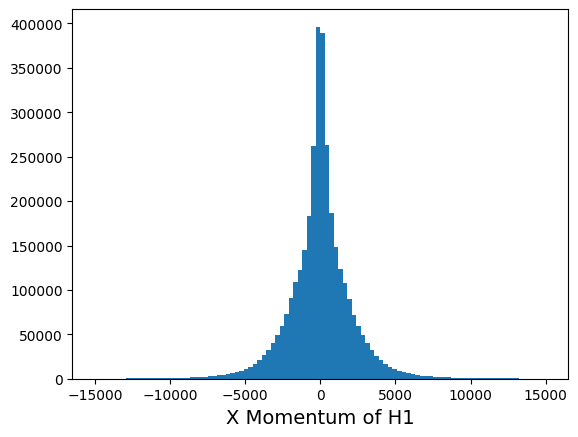

In [4]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

Text(0, 0.5, 'Number of events')

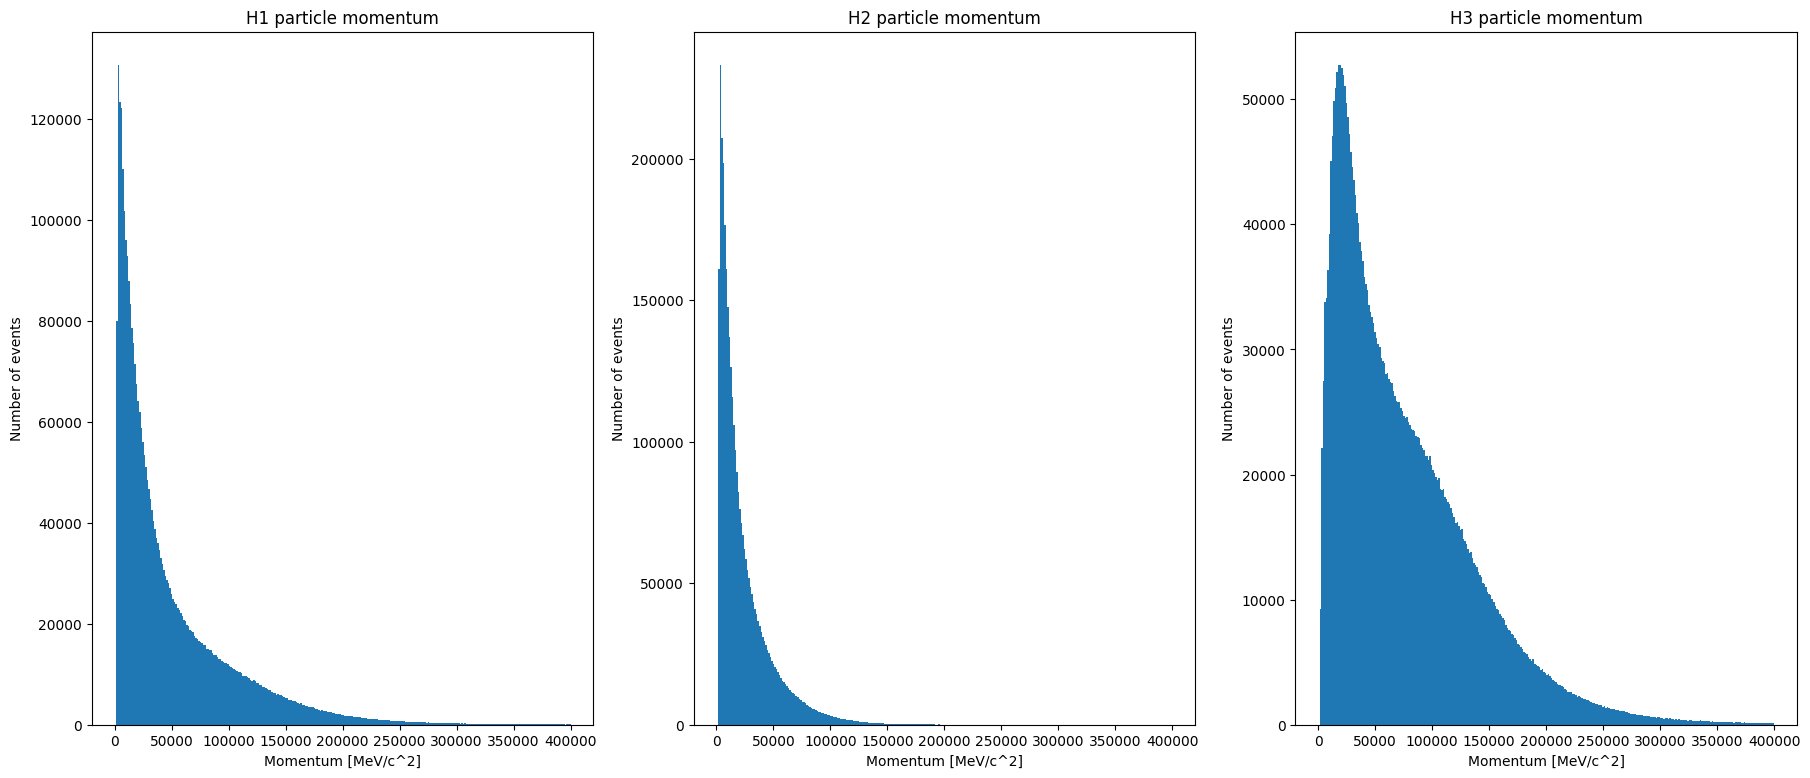

In [5]:
#Installing uproot to decrease crashes
!pip install uproot awkward lz4 xxhash
import uproot
f=uproot.open ("/content/LHCb_Data/B2HHH_MagnetUp.root")
f.keys()
#Finding data with uproot
f["DecayTree"].show()

#Library for histograms
!pip install boost-histogram

#import numpy as np
import math
from numpy import sqrt
#import ROOT
import uproot
from matplotlib import pyplot as plt
import boost_histogram as bh

Events = f['DecayTree']

#Extracting momentum coponents of daughter particle 1
xp_H1 = f["DecayTree//H1_PX"].array() #array extracts data as Awkward array (used for large data set)
yp_H1 = f["DecayTree//H1_PY"].array()
zp_H1 = f["DecayTree//H1_PZ"].array()

#Extracting momentum components of daughter particle 2
xp_H2 = f["DecayTree//H2_PX"].array()
yp_H2 = f["DecayTree//H2_PY"].array()
zp_H2 = f["DecayTree//H2_PZ"].array()

#Extracting momentum components of daughter particle 2
xp_H3 = f["DecayTree//H3_PX"].array()
yp_H3 = f["DecayTree//H3_PY"].array()
zp_H3 = f["DecayTree//H3_PZ"].array()

#Computing total momentum (magnitude and direction) for daughter partciel 1/2/3
H1_Ptot = ((xp_H1**2)+(yp_H1**2)+(zp_H1**2))**0.5

H2_Ptot = ((xp_H2**2)+(yp_H2**2)+(zp_H2**2))**0.5

H3_Ptot = ((xp_H3**2)+(yp_H3**2)+(zp_H3**2))**0.5

fig=plt.figure(figsize=(22,9))
plt.subplot(1,3,1)
histPtot1 = bh.Histogram(bh.axis.Regular(300,0,400000))
histPtot1.fill(H1_Ptot)
plt.bar(histPtot1.axes[0].centers, histPtot1.values(), width=histPtot1.axes[0].widths)
plt.title('H1 particle momentum')
plt.xlabel('Momentum [MeV/c^2]')
plt.ylabel('Number of events')


plt.subplot(1,3,2)
histPtot2 = bh.Histogram(bh.axis.Regular(300,0,400000))
histPtot2.fill(H2_Ptot)
plt.bar(histPtot2.axes[0].centers, histPtot2.values(), histPtot2.axes[0].widths)
plt.title('H2 particle momentum')
plt.xlabel('Momentum [MeV/c^2]')
plt.ylabel('Number of events')

plt.subplot(1,3,3)
histPtot3 = bh.Histogram(bh.axis.Regular(300,0,400000))
histPtot3.fill(H3_Ptot)
plt.bar(histPtot3.axes[0].centers, histPtot3.values(), histPtot3.axes[0].widths)
plt.title('H3 particle momentum')
plt.xlabel('Momentum [MeV/c^2]')
plt.ylabel('Number of events')

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

Text(0, 0.5, 'Number of events')

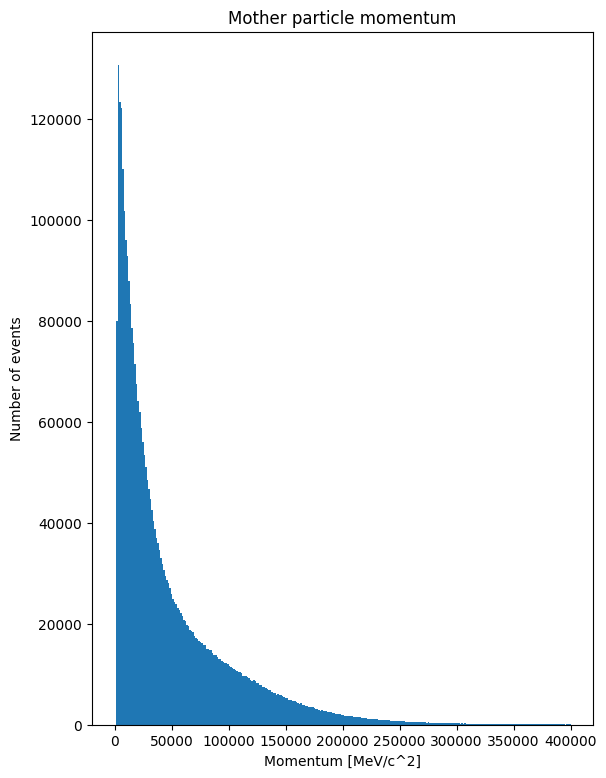

In [6]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...


#Installing uproot to decrease crashes
!pip install uproot awkward lz4 xxhash
import uproot
f=uproot.open ("/content/LHCb_Data/B2HHH_MagnetUp.root")
f.keys()
#Finding data with uproot
f["DecayTree"].show()

#Library for histograms
!pip install boost-histogram

#import numpy as np
import math
from numpy import sqrt
#import ROOT
import uproot
from matplotlib import pyplot as plt
import boost_histogram as bh

#Extracting momentum coponents of daughter particle 1
xp_H1 = f["DecayTree//H1_PX"].array() #array extracts data as Awkward array (used for large data set)
yp_H1 = f["DecayTree//H1_PY"].array()
zp_H1 = f["DecayTree//H1_PZ"].array()

#Extracting momentum components of daughter particle 2
xp_H2 = f["DecayTree//H2_PX"].array()
yp_H2 = f["DecayTree//H2_PY"].array()
zp_H2 = f["DecayTree//H2_PZ"].array()

#Extracting momentum components of daughter particle 2
xp_H3 = f["DecayTree//H3_PX"].array()
yp_H3 = f["DecayTree//H3_PY"].array()
zp_H3 = f["DecayTree//H3_PZ"].array()



#Vector components for mother momentum
xp_mother = xp_H1 + xp_H2 + xp_H3
yp_mother = yp_H1 + yp_H2 + yp_H3
zp_mother = zp_H1 + zp_H2 + zp_H3

#Formula to compute total momentum of mother particle (magnitude and direction)
B_ptotal = (xp_mother**2 + yp_mother**2 + zp_mother**2)**0.5

fig=plt.figure(figsize=(22,9))
plt.subplot(1,3,1)
histPtot1 = bh.Histogram(bh.axis.Regular(300,0,400000))
histPtot1.fill(H1_Ptot)
plt.bar(histPtot1.axes[0].centers, histPtot1.values(), width=histPtot1.axes[0].widths)
plt.title('Mother particle momentum')
plt.xlabel('Momentum [MeV/c^2]')
plt.ylabel('Number of events')

In [7]:
import uproot
f=uproot.open ("/content/LHCb_Data/B2HHH_MagnetUp.root")
Events = f['DecayTree']
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches = Events.arrays()

# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()

# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")


for branch, value in branches_dictionary[45].items():
    print (f"{branch}  :  {value}")

Event number #45
-------------------
B_FlightDistance  :  4.714065519134621
B_VertexChi2  :  11.527835642103977
H1_PX  :  133.37597488306847
H1_PY  :  -1293.522713059599
H1_PZ  :  33534.216564227696
H1_ProbK  :  0.007352352142333984
H1_ProbPi  :  0.20490717887878418
H1_Charge  :  1
H1_IPChi2  :  22.988488167413408
H1_isMuon  :  0
H2_PX  :  518.942836815797
H2_PY  :  -1966.1964311195359
H2_PZ  :  52184.74396649723
H2_ProbK  :  0.004820436239242554
H2_ProbPi  :  0.26665544509887695
H2_Charge  :  -1
H2_IPChi2  :  20.56519869481346
H2_isMuon  :  0
H3_PX  :  1383.6240376483754
H3_PY  :  -2008.3497468201033
H3_PZ  :  12153.955489049204
H3_ProbK  :  0.08002465963363647
H3_ProbPi  :  0.4037107229232788
H3_Charge  :  -1
H3_IPChi2  :  1584.9516601284706
H3_isMuon  :  0


In [8]:
import numpy as np
import matplotlib.pyplot as plt


#Mass of kaons in MeV
m_kaon = 493.677


#Extracting momentum components of Kaon 1
xp_K1 = f["DecayTree/H1_PX"].array()
yp_K1 = f["DecayTree/H1_PY"].array()
zp_K1 = f["DecayTree/H1_PZ"].array()

#Extracting momentum components of Kaon 2
xp_K2 = f["DecayTree/H2_PX"].array()
yp_K2 = f["DecayTree/H2_PY"].array()
zp_K2 = f["DecayTree/H2_PZ"].array()

#Extracting momentum components of Kaon 3
xp_K3 = f["DecayTree/H3_PX"].array()
yp_K3 = f["DecayTree/H3_PY"].array()
zp_K3 = f["DecayTree/H3_PZ"].array()

K1_Ptot = (xp_K1**2 + yp_K1**2 + zp_K1**2)**0.5
K2_Ptot = (xp_K2**2 + yp_K2**2 + zp_K2**2)**0.5
K3_Ptot = (xp_K3**2 + yp_K3**2 + zp_K3**2)**0.5

#Vector components for kaon momentum
xp_kaon = xp_K1 + xp_K2 + xp_K3
yp_kaon = yp_K1 + yp_K2 + yp_K3
zp_kaon = zp_K1 + zp_K2 + zp_K3

#Formula to compute total momentum of kaon particle (magnitude and direction)
M_Ptot = (xp_kaon**2 + yp_kaon**2 + zp_kaon**2)**0.5

#Formula for energy of Kaon 1/2/3

E_K1 = (K1_Ptot**2 + m_kaon**2)**0.5
E_K2 = (K2_Ptot**2 + m_kaon**2)**0.5
E_K3 = (K3_Ptot**2 + m_kaon**2)**0.5

E_tot = E_K1 + E_K2 + E_K3

Text(0, 0.5, 'Number of events')

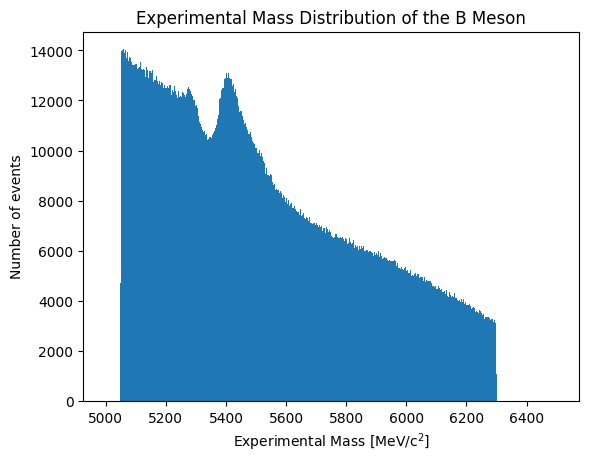

In [9]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters

#Now plot a histogram of the range of masses of the B meson.

#Does this match what we would expect from theory?

#Hint - look it up

#Library for histograms
!pip install boost-histogram

#import numpy as np
import math
from numpy import sqrt
from matplotlib import pyplot as plt
import boost_histogram as bh

#Formula for experimental mass
Experimental_mass=(((E_tot)**2)-((M_Ptot)**2))**0.5

plt.figure(1)
hist_mass = bh.Histogram(bh.axis.Regular(500, 5000, 6500))
hist_mass.fill(Experimental_mass)
plt.bar(hist_mass.axes[0].centers, hist_mass.values(), hist_mass.axes[0].widths)
plt.title('Experimental Mass Distribution of the B Meson')
plt.xlabel('Experimental Mass [MeV/c$^2$]')
plt.ylabel('Number of events')

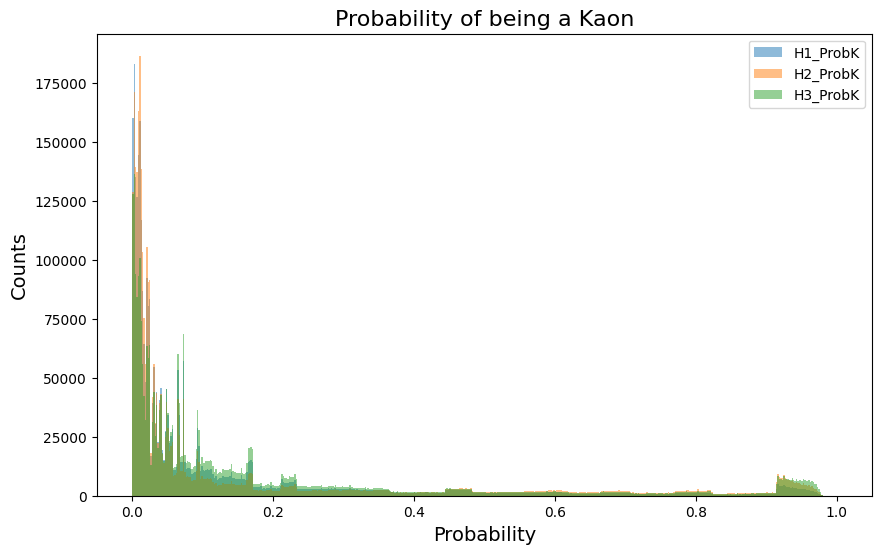

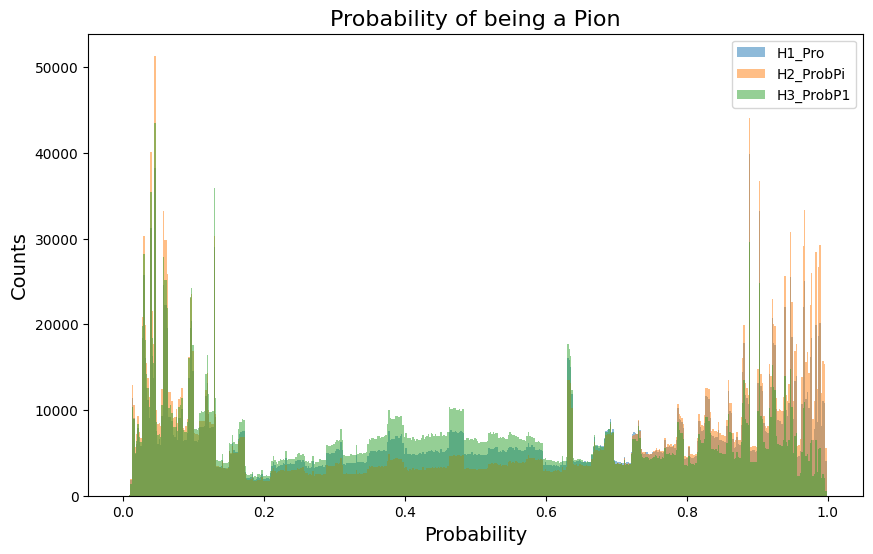

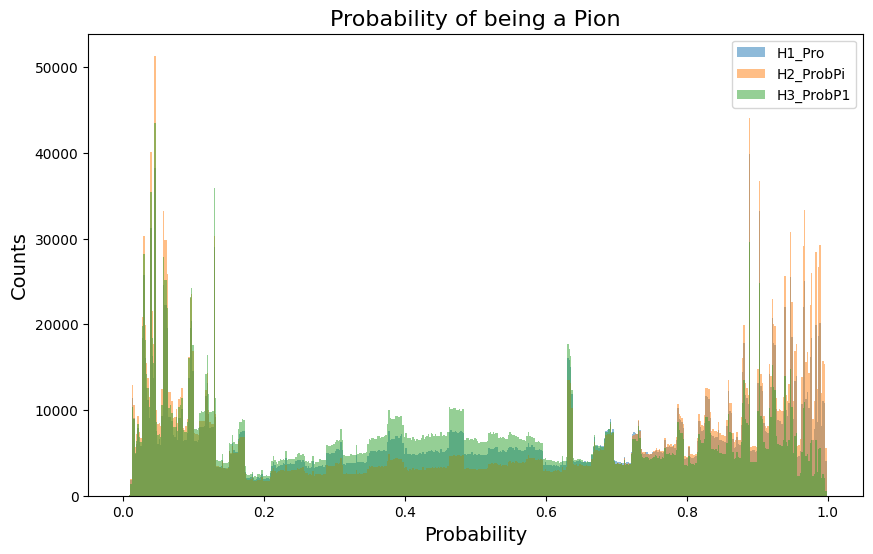

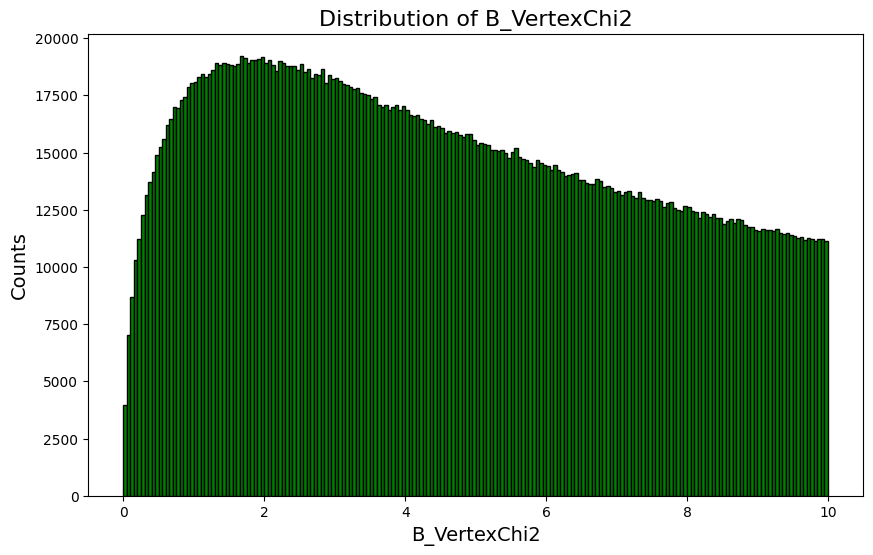

In [10]:
#Make plots of H1/H2/H3 _ProbK on one plot


#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2
# Plot any other variables from the list above you think would be handy to use in a selection...


#Make plots of H1/H2/H3 ProbK on one plot
H1_ProbK = Events ['H1_ProbK'].array()
H2_ProbK = Events ['H2_ProbK'].array()
H3_ProbK = Events['H3_ProbK'].array ()


plt.figure(figsize=(10, 6))
plt.hist(H1_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H1_ProbK')
plt.hist(H2_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H2_ProbK')
plt.hist(H3_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H3_ProbK')
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()
plt.title( 'Probability of being a Kaon', fontsize=16)
plt.show()


#Make plots of H1/H2/H3 ProbPi on one plot
H1_ProbPi = Events['H1_ProbPi'].array()
H2_ProbPi = Events['H2_ProbPi'].array()
H3_ProbPi = Events['H3_ProbPi'].array()


plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H1_Pro')
plt.hist(H2_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H3_ProbP1')
plt.xlabel('Probability', fontsize=14)
plt.ylabel ('Counts', fontsize=14)
plt.legend()
plt.title('Probability of being a Pion', fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H1_Pro')
plt.hist(H2_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H3_ProbP1')
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend ()
plt.title('Probability of being a Pion', fontsize=16)
plt.show()

#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = Events ['B_VertexChi2'].array()

# Plot the B_VertexChi2
plt.figure(figsize=(10, 6))
plt.hist(B_VertexChi2, bins=200, range=(0, 10), color='green', edgecolor='black')
plt.xlabel('B_VertexChi2', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title( 'Distribution of B_VertexChi2', fontsize=16)
plt.show()

In [11]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)

#Defining probability of being a muon
H1_isMuon = branches['H1_isMuon']
H2_isMuon = branches['H2_isMuon']
H3_isMuon = branches['H3_isMuon']


#Selection
H1_ProbK > H1_ProbPi
H2_ProbK > H2_ProbPi
H3_ProbK > H3_ProbPi
H1_isMuon == 0
H2_isMuon == 0
H3_isMuon == 0


selection = (branches["H1_ProbK"] > branches["H1_ProbPi"]) & (branches["H2_ProbK"] > branches["H2_ProbPi"]) & (branches["H3_ProbK"] > branches["H3_ProbPi"]) & (branches["H1_isMuon"] == 0) & (branches["H2_isMuon"] == 0) & (branches["H3_isMuon"] == 0)

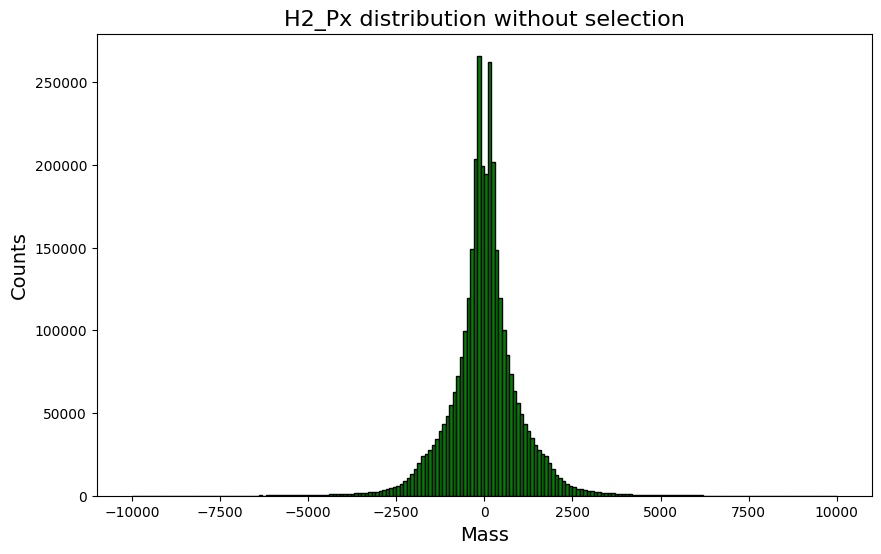

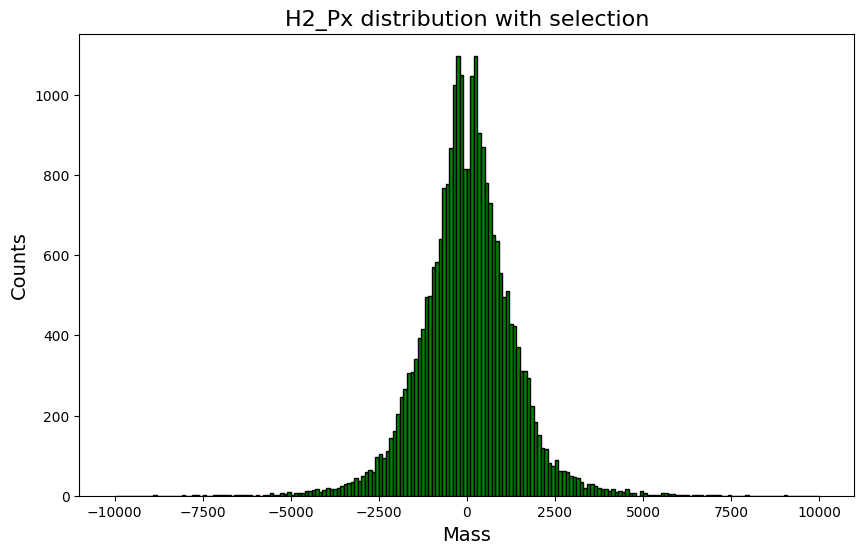

In [12]:
#Plotting H2_PX without selection
plt.figure(figsize=(10, 6))
plt.hist(branches['H2_PX'], bins=200, range=(-10000, 10000), color='green', edgecolor='black')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title( 'H2_Px distribution without selection', fontsize=16)
plt.show()



#To apply the selection - we can use the selection command after our instruction e.g.:
CutTree=branches['H2_PX'][selection]

#Plotting H2_PX with selection
plt.figure(figsize=(10, 6))
plt.hist(branches['H2_PX'][selection], bins=200, range=(-10000, 10000), color='green', edgecolor='black')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title( 'H2_Px distribution with selection', fontsize=16)
plt.show()


#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree



#Try plotting our H2_PX distribution with and without the selection and spot the differences...

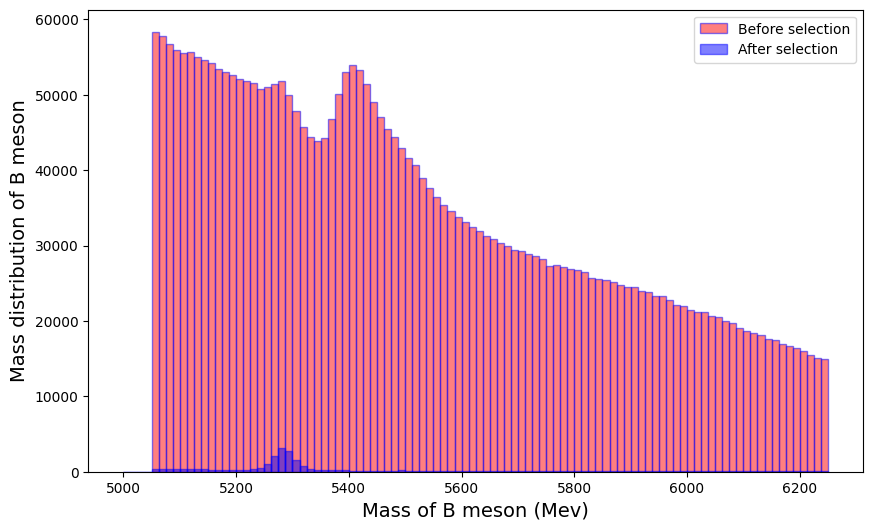

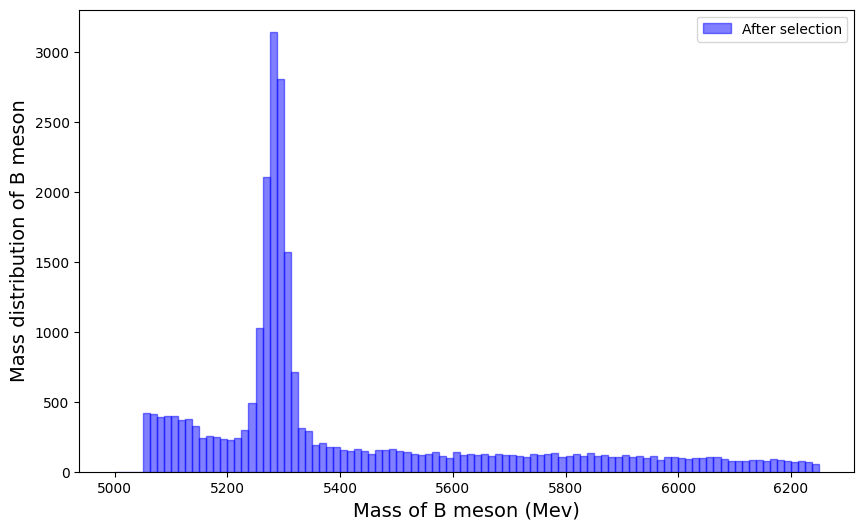

In [13]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.


#Formula for experimental mass before selection
Experimental_mass=(((E_tot)**2)-((M_Ptot)**2))**0.5

#Experimental mass after selection
Experimental_mass_selection=Experimental_mass[selection]

H1_E_tot = E_K1[selection]
H2_E_tot = E_K2[selection]
H3_E_tot = E_K3[selection]
H1_Px = xp_K1[selection]
H2_Px = xp_K2[selection]
H3_Px = xp_K3[selection]
H1_Py = yp_K1[selection]
H2_Py = yp_K2[selection]
H3_Py = yp_K3[selection]
H1_Pz = zp_K1[selection]
H2_Pz = zp_K2[selection]
H3_Pz = zp_K3[selection]




#Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(Experimental_mass, bins=100, range=(5000, 6250), alpha=0.5, label='Before selection', color = 'red', edgecolor= 'blue')
plt.hist(Experimental_mass_selection, bins=100, range=(5000, 6250), alpha=0.5, label='After selection', color = 'blue', edgecolor = 'blue')
plt.xlabel('Mass of B meson (Mev)', fontsize=14)
plt.ylabel('Mass distribution of B meson', fontsize=14)
plt.legend ()
plt.show()



plt.figure(figsize=(10, 6))
plt.hist(Experimental_mass_selection, bins=100, range=(5000, 6250), alpha=0.5, label='After selection', color = 'blue', edgecolor = 'blue')
plt.xlabel('Mass of B meson (Mev)', fontsize=14)
plt.ylabel('Mass distribution of B meson', fontsize=14)
plt.legend ()
plt.show()


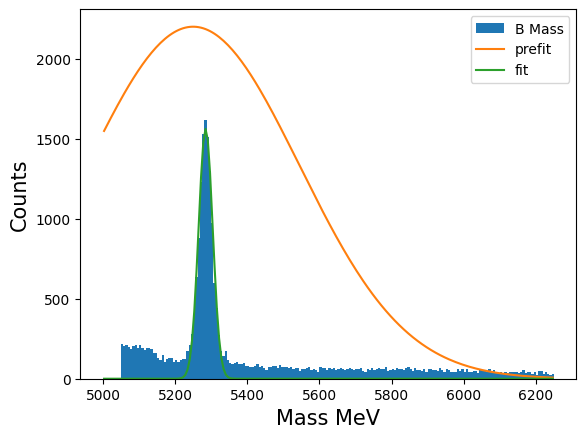

In [14]:
# Grab another package
from scipy.optimize import curve_fit


# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height, bin_edge, _ = plt.hist(Experimental_mass_selection, range=(5000, 6250), bins=200, label = "B Mass")

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height


#Create a Gauss function for fitting - nothing needs changing here
def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#Defining initial parameters
A_guess = 2200
mu_guess = 5250
sigma_guess = np.std(Experimental_mass_selection)

initial_guess = [A_guess, mu_guess, sigma_guess]

# Get the fitted curve - some things need changing here
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=initial_guess);
#note you need to pick some initial parameters in p0= above!
y_before_guess = gauss(x_data, *initial_guess)
yfit = gauss(x_data, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well
plt.plot(x_data, y_before_guess, label='prefit')
plt.plot(x_data, yfit, label='fit');
plt.xlabel("Mass MeV", fontsize=15)
plt.ylabel("Counts", fontsize=15)

plt.legend()
plt.show()

Optimized Gaussian Parameters: A = 1561.88, mu = 5284.72, sigma = 19.51
Optimized Gaussian Parameters: A = 1561.88, mu = 5284.72, sigma = 19.51
Fitted Gaussian: A=1502.86, mu=5284.81, sigma=17.49
Fitted Exponential: B=23840.46, alpha=0.001034


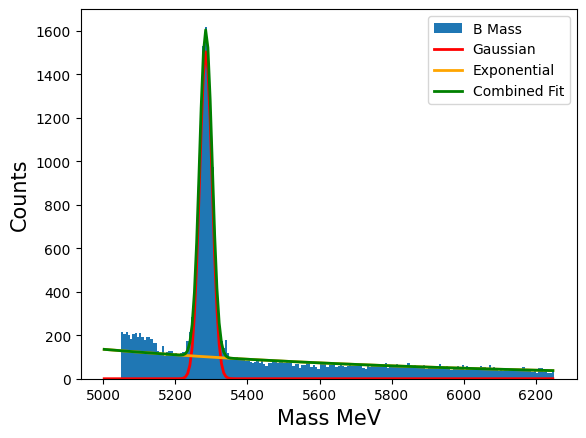

In [15]:
# Explore optimisedParameters - what does it contain?
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...

# Print optimised parameters from previous fit
print(f"Optimized Gaussian Parameters: A = {optimisedParameters[0]:.2f}, mu = {optimisedParameters[1]:.2f}, sigma = {optimisedParameters[2]:.2f}")


bin_height, bin_edge, _ = plt.hist(Experimental_mass_selection, range=(5000, 6250), bins=200, label="B Mass")

# Create an Exponential function for background
def exponential(x, B, alpha):
    return B * np.exp(-alpha * x)

# Define a combined model of Gaussian and Exponential (background)
def combined_model(x, A, mu, sigma, B, alpha):
    return gauss(x, A, mu, sigma) + exponential(x, B, alpha)



# Convert bin edges to bin centers
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

# Define Initial Guesses
#From previous code
A_guess = optimisedParameters[0]   # Take from previous fit
mu_guess = optimisedParameters[1]
sigma_guess = optimisedParameters[2]

# Print optimised parameters from previous fit
print(f"Optimized Gaussian Parameters: A = {optimisedParameters[0]:.2f}, mu = {optimisedParameters[1]:.2f}, sigma = {optimisedParameters[2]:.2f}")

#Estimates for bakground amplitude and decay rate
B_guess = 500
alpha_guess = 0.0005

initial_guess_combined = [A_guess, mu_guess, sigma_guess, B_guess, alpha_guess]

# Get the fitted curve for both exponential and gaussian
optimised_combined, pcov_combined = curve_fit(combined_model, x_data, y_data, p0=initial_guess_combined)

# Extracting the parameters and printing them
A_fit, mu_fit, sigma_fit, B_fit, alpha_fit = optimised_combined
print(f"Fitted Gaussian: A={A_fit:.2f}, mu={mu_fit:.2f}, sigma={sigma_fit:.2f}")
print(f"Fitted Exponential: B={B_fit:.2f}, alpha={alpha_fit:.6f}")

# Generate fitted curves
y_gauss_fit = gauss(x_data, A_fit, mu_fit, sigma_fit)
y_exponential_fit = exponential(x_data, B_fit, alpha_fit)
y_combined_fit = combined_model(x_data, A_fit, mu_fit, sigma_fit, B_fit, alpha_fit)


# Overlaying the fits
plt.plot(x_data, y_gauss_fit, label='Gaussian', color='red', linewidth=2)
plt.plot(x_data, y_exponential_fit, label='Exponential', color='orange', linewidth=2)
plt.plot(x_data, y_combined_fit, label='Combined Fit', color='green', linewidth=2)
plt.xlabel("Mass MeV", fontsize=15)
plt.ylabel("Counts", fontsize=15)

plt.legend()
plt.show()

Optimized Gaussian Parameters: A = 1561.88, mu = 5284.72, sigma = 19.51


<ipython-input-16-3563f70a1593>:14: RuntimeWarning: invalid value encountered in power
  A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) / ((n / abs(alpha) - abs(alpha) - z) ** n),
<ipython-input-16-3563f70a1593>:14: RuntimeWarning: invalid value encountered in scalar power
  A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) / ((n / abs(alpha) - abs(alpha) - z) ** n),


Fitted Crystal Ball: A=1519.83, mu=5284.86, sigma=17.59, n=0.63, alpha=2.00
Fitted Exponential: B=4125.85, beta=0.000734


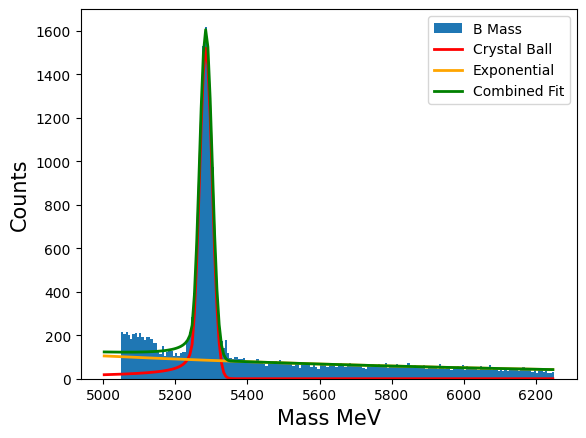

In [16]:
# Explore optimisedParameters - what does it contain?
# The following code is done for crystal ball + exponential model

# Printing the optimised parameters chosen in previous codes for Crystal Ball function
print(f"Optimized Gaussian Parameters: A = {optimisedParameters[0]:.2f}, mu = {optimisedParameters[1]:.2f}, sigma = {optimisedParameters[2]:.2f}")

# Creating a fucntion for Crystal Ball
def crystal_ball(x, A, mu, sigma, n, alpha):
    z = (x - mu) / sigma
    if isinstance(x, np.ndarray):
        result = np.where(
            z > -alpha,
            A * np.exp(-0.5 * z**2),
            A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) / ((n / abs(alpha) - abs(alpha) - z) ** n),
        )
    else:
        if z > -alpha:
            result = A * np.exp(-0.5 * z**2)
        else:
            result = A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) / ((n / abs(alpha) - abs(alpha) - z) ** n)
    return result

# Function to combine the function of Crystal Ball and Exponential function (taken from the previous code)
def combined_crystalball_model(x, A, mu, sigma, n, alpha, B, beta):
    return crystal_ball(x, A, mu, sigma, n, alpha) + exponential(x, B, beta)

# Extracting the bin height and its edges
bin_height, bin_edge, _ = plt.hist(Experimental_mass_selection, range=(5000, 6250), bins=200, label="B Mass")

# Convert bin edges to bin centers
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

# Defining Initial Guesses

#Define the initial parameters already decided in the previous code for exponential
A_guess = optimisedParameters[0]
mu_guess = optimisedParameters[1]
sigma_guess = optimisedParameters[2]

#Guesses for Crystal Ball
n_guess = 5
alpha_guess = 1.5
B_guess = 500
beta_guess = 0.0005

initial_guess_combined = [A_guess, mu_guess, sigma_guess, n_guess, alpha_guess, B_guess, beta_guess]

# Get the fitted data
optimised_combined, pcov_combined = curve_fit(combined_crystalball_model, x_data, y_data, p0=initial_guess_combined)

# Extracting the parameters and printing them
A_fit, mu_fit, sigma_fit, n_fit, alpha_fit, B_fit, beta_fit = optimised_combined
print(f"Fitted Crystal Ball: A={A_fit:.2f}, mu={mu_fit:.2f}, sigma={sigma_fit:.2f}, n={n_fit:.2f}, alpha={alpha_fit:.2f}")
print(f"Fitted Exponential: B={B_fit:.2f}, beta={beta_fit:.6f}")

# Generate fitted curves
y_crystal_fit = crystal_ball(x_data, A_fit, mu_fit, sigma_fit, n_fit, alpha_fit)
y_exponential_fit = exponential(x_data, B_fit, beta_fit)
y_combined_fit = combined_crystalball_model(x_data, A_fit, mu_fit, sigma_fit, n_fit, alpha_fit, B_fit, beta_fit)

# Overlaying the fits
plt.plot(x_data, y_crystal_fit, label='Crystal Ball', color='red', linewidth=2)
plt.plot(x_data, y_exponential_fit, label='Exponential', color='orange', linewidth=2)
plt.plot(x_data, y_combined_fit, label='Combined Fit', color='green', linewidth=2)
plt.xlabel("Mass MeV", fontsize=15)
plt.ylabel("Counts", fontsize=15)

plt.legend()
plt.show()

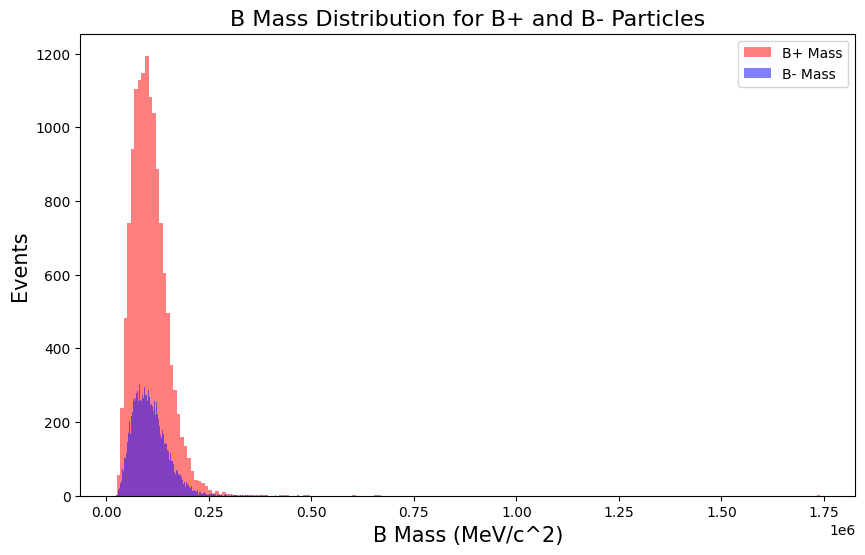

The number of B Plus: 18219.801290164447
The number of B Min: 17614.93420566126
The asymmetry between B Plus and B Min is: -0.016879351169583705 with uncertainty: 0.005281849491266421


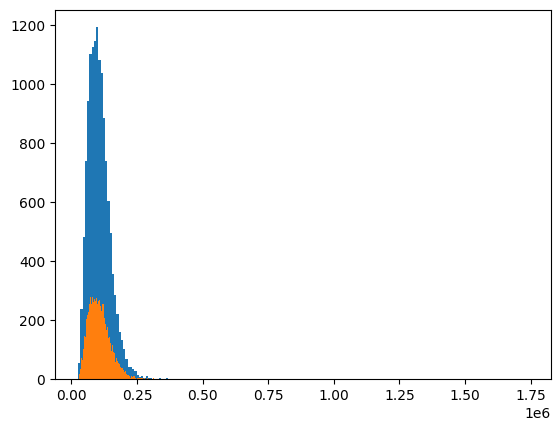

In [18]:
from scipy.optimize import curve_fit


#Optimizing parameters from the combined model of Gaussian and exponential
def get_parameters(initial_params, x_data, y_data):
    optimised_params, pcov = curve_fit(
        lambda x, A, mu, sigma, B, alpha: combined_model(x, A, mu, sigma, B, alpha),
        x_data, y_data, p0=initial_params
    )
    return optimised_params, pcov


# Extracting charge values for the three daughter particles
H1_Charge = f["DecayTree//H1_Charge"].array()
H2_Charge = f["DecayTree//H2_Charge"].array()
H3_Charge = f["DecayTree//H3_Charge"].array()


# Defining the charge selection masks with existing selection
charge_selection_B_Plus = (H1_Charge + H2_Charge + H3_Charge == 1) & selection
charge_selection_B_Min = (H1_Charge + H2_Charge + H3_Charge == -1) & selection



# Extracting the momentum components for x,y and z for the selected events
xp_H1_Cut_Plus, xp_H2_Cut_Plus, xp_H3_Cut_Plus = xp_H1[charge_selection_B_Plus], xp_H2[charge_selection_B_Plus], xp_H3[charge_selection_B_Plus]
yp_H1_Cut_Plus, yp_H2_Cut_Plus, yp_H3_Cut_Plus = yp_H1[charge_selection_B_Plus], yp_H2[charge_selection_B_Plus], yp_H3[charge_selection_B_Plus]
zp_H1_Cut_Plus, zp_H2_Cut_Plus, zp_H3_Cut_Plus = zp_H1[charge_selection_B_Plus], zp_H2[charge_selection_B_Plus], zp_H3[charge_selection_B_Plus]

xp_H1_Cut_Min, xp_H2_Cut_Min, xp_H3_Cut_Min = xp_H1[charge_selection_B_Min], xp_H2[charge_selection_B_Min], xp_H3[charge_selection_B_Min]
yp_H1_Cut_Min, yp_H2_Cut_Min, yp_H3_Cut_Min = yp_H1[charge_selection_B_Min], yp_H2[charge_selection_B_Min], yp_H3[charge_selection_B_Min]
zp_H1_Cut_Min, zp_H2_Cut_Min, zp_H3_Cut_Min = zp_H1[charge_selection_B_Min], zp_H2[charge_selection_B_Min], zp_H3[charge_selection_B_Min]

# Computing the mass of B+ and B- meson
M_B_Plus = (((xp_H1_Cut_Plus + xp_H2_Cut_Plus + xp_H3_Cut_Plus)**2 + (yp_H1_Cut_Plus + yp_H2_Cut_Plus + yp_H3_Cut_Plus)**2 + (zp_H1_Cut_Plus + zp_H2_Cut_Plus + zp_H3_Cut_Plus)**2)**0.5)
M_B_Min = (((xp_H1_Cut_Min + xp_H2_Cut_Min + xp_H3_Cut_Min)**2 + (yp_H1_Cut_Min + yp_H2_Cut_Min + yp_H3_Cut_Min)**2 + (zp_H1_Cut_Min + zp_H2_Cut_Min + zp_H3_Cut_Min)**2)**0.5)



# Plotting the histograms for B+ and B- mass distributions
plt.figure(figsize=(10, 6))
plt.hist(M_B_Plus, bins=200, alpha=0.5, color='red', label='B+ Mass')
plt.hist(M_B_Min, bins=200, alpha=0.5, color='blue', label='B- Mass')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Mass Distribution for B+ and B- Particles", fontsize=16)
plt.legend()
plt.show()



# Fit Gaussian and Exponential functions
bin_height_Plus, bin_edge_Plus, _ = plt.hist(M_B_Plus, bins=200)
bin_height_Min, bin_edge_Min, _ = plt.hist(M_B_Min, bins=200)

x_data_Plus = 0.5 * (bin_edge_Plus[1:] + bin_edge_Plus[:-1])
y_data_Plus = bin_height_Plus
x_data_Min = 0.5 * (bin_edge_Min[1:] + bin_edge_Min[:-1])
y_data_Min = bin_height_Min

# Optimizing the parameters for the fits
initialParameters_B_Plus = [max(y_data_Plus), np.mean(M_B_Plus), np.std(M_B_Plus), max(y_data_Plus)*0.2, 0.00001]
initialParameters_B_Min = [max(y_data_Min), np.mean(M_B_Min), np.std(M_B_Min), max(y_data_Min)*0.2, 0.00001]

optimisedParameters_B_Plus, pcov_B_Plus = get_parameters(initialParameters_B_Plus, x_data_Plus, y_data_Plus)
optimisedParameters_B_Min, pcov_B_Min = get_parameters(initialParameters_B_Min, x_data_Min, y_data_Min)

# Extracting the above fitted parameters
A_Plus, mu_Plus, sigma_Plus, B_Plus, C_Plus = optimisedParameters_B_Plus
A_Min, mu_Min, sigma_Min, B_Min, C_Min = optimisedParameters_B_Min


# Compute areas under the Gaussian curves
area_gauss_Plus = (A_Plus * sigma_Plus * np.sqrt(2 * np.pi)) / (max(x_data_Plus) - min(x_data_Plus)) * 200
area_gauss_Min = (A_Min * sigma_Min * np.sqrt(2 * np.pi)) / (max(x_data_Min) - min(x_data_Min)) * 200

# Computing the asymmetry
asymmetry = (area_gauss_Min - area_gauss_Plus) / (area_gauss_Min + area_gauss_Plus)

#Computing the uncertanty on asymmetry
uncertainty_asymmetry = np.sqrt((1 - asymmetry**2) / (area_gauss_Min + area_gauss_Plus))

print(f'The number of B Plus: {area_gauss_Plus}')
print(f'The number of B Min: {area_gauss_Min}')
print(f'The asymmetry between B Plus and B Min is: {asymmetry} with uncertainty: {uncertainty_asymmetry}')

The asymmetry from the magnet down is 5.69% with a percentage error of 0.44% while the asymmetry for the magnet up is 1.68% with a percentage error of 0.52%.
The asymmetry is present in both results therefore we can say that the results are reasonable. we also observe that the asymmetry is negative for both magnets which means that the differences is mostly due to physical effects. If it wes because of the detector being faulty then the signs would change when switching between magnet up and down.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)